In [ ]:
# import data and libraries
# apply min max scaler
# select close column and covert it into 2d array as most ml model expect this
# split into x and y
# again apply train , test , split
# train and fit model
# evaluate model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/goog.csv");
df

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


In [ ]:
data = df["Close"].values
data

array([794.200012, 796.419983, 794.559998, 791.26001 , 789.909973,
       791.549988, 785.049988, 782.789978, 771.820007, 786.140015,
       786.900024, 794.02002 , 806.150024, 806.650024, 804.789978,
       807.909973, 806.359985, 807.880005, 804.609985, 806.070007,
       802.174988, 805.02002 , 819.309998, 823.869995, 835.669983,
       832.150024, 823.309998, 802.320007, 796.789978, 795.695007,
       798.530029, 801.48999 , 801.340027, 806.969971, 808.380005,
       809.559998, 813.669983, 819.23999 , 820.450012, 818.97998 ,
       824.159973, 828.070007, 831.659973, 830.76001 , 831.330017,
       828.640015, 829.280029, 823.210022, 835.23999 , 830.630005,
       829.080017, 827.780029, 831.909973, 835.369995, 838.679993,
       843.25    , 845.539978, 845.619995, 847.200012, 848.780029,
       852.119995])

In [ ]:
data = data.reshape(-1,1)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)

In [ ]:
x = []
y = []
time_steps = 6
for i in range (0 , len(data)-time_steps-1):
  x.append( data[ i:i+time_steps , 0] )
  y.append( data[ i+time_steps , 0] )


In [ ]:
x= np.array(x)
y = np.array(y).reshape(-1,1)

NameError: name 'np' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train_scaled , x_test_scaled , y_train , y_test = train_test_split( x , y , random_state = 42)

In [ ]:
y_train.shape

(40, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
x_train_scaled = scaler1.fit_transform(x_train_scaled)
x_test_scaled = scaler1.transform(x_test_scaled)
scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
model = Sequential()

model.add( LSTM(50 , input_shape=( time_steps , 1),return_sequences=True ) )
model.add( LSTM( 50) )
model.add( Dense(1) )
model.compile( optimizer = "adam" , loss='mse')

# Input shape for each sample is (timesteps, features)
# return_sequences=True:
# Means this LSTM will return the full sequence of outputs (not just the last one)
# , which is necessary if another LSTM layer follows.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train_scaled, y_train , epochs = 50 ,  batch_size=4)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3362
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0323
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0343
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0228
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0266
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0300
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0311
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0225
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0253
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0279
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0298
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0197
Epoch 16

In [ ]:
y_pred = model.predict(x_test_scaled)
from sklearn.metrics import mean_squared_error , mean_absolute_error
print( mean_squared_error(y_pred, y_test) )
print( mean_absolute_error(y_pred, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
0.011940315719525712
0.08809652485064438


In [ ]:
y_pred_inverse = scaler2.inverse_transform(y_pred)
y_test_inverse = scaler2.inverse_transform(y_test)
print( mean_squared_error(y_pred_inverse , y_test_inverse ) )
print( mean_absolute_error(y_pred_inverse , y_test_inverse ))

70.72067259130951
6.77991157087054


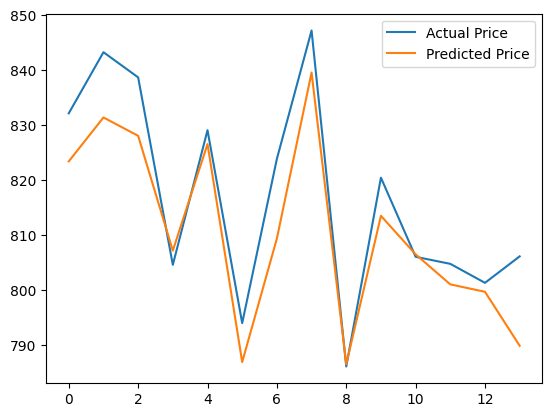

In [ ]:
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(y_pred_inverse, label='Predicted Price')
# plt.grid(True)
plt.legend()
plt.show()